# Example Usage of the *Field_Protocol_Reader.py* Methods

## Setup ##

Import modules and change current working directory to setup environment:

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-from __future__ import print_function
from mni2017.field_protocol_reader import field_data, plot_field, create_multiindex_df, create_reasonable_multiindex_df, plot_from_reasonable_df
import os

# change current working directory to folder with field protocol:
path = '/media/thomas/NAS_Data/2017_MNI_campaign/field_data/MULTIPLY'
os.chdir(path)

# initialize field_data class object, load field data in 'MULTIPLY.xlsx
field = field_data(filename='MULTIPLY.xlsx')




## UPDATE ##

added *create_reasonable_multiindex_df* to facilitate working with the actual data ~~as default option when initializing the class object.~~

~~One may set the option *create_df* *False* if additional .xlsx-files should be added to the class object as this only works with the old procedure.~~

~~The dataframe can then afterwards be created via *create_reasonable_multiindex_df(field.data.items())*.~~

In [2]:
field_df = create_reasonable_multiindex_df(field.data.items())
field_df

301 (WT) high                                                       \
                    BBCH Chlorophyll measurement 1 [avarage of 10 SPAD Units]   
2017-03-24          24.0                                               49.2     
2017-03-28          24.0                                               44.2     
2017-04-05          28.0                                               56.4     
2017-04-10          29.0                                               50.1     
2017-04-21          31.0                                               40.9     
2017-05-02          31.0                                               47.7     

                                                                 \
           Chlorophyll measurement 2 [avarage of 10 SPAD Units]   
2017-03-24                                               53.1     
2017-03-28                                               42.1     
2017-04-05                                               57.5     
2017-04-10                                               55.9     
2017-04-21                                               53.8     
2017-05-02                                               46.7     

                                                                 \
           Chlorophyll measurement 3 [avarage of 10 SPAD Units]   
2017-03-24                                               48.9     
2017-03-28                                               47.8     
2017-04-05                                               55.6     
2017-04-10                                               45.5     
2017-04-21                                               44.1     
2017-05-02                                               42.4     

                                                                 \
           Chlorophyll measurement 4 [avarage of 10 SPAD Units]   
2017-03-24                                               56.1     
2017-03-28                                               38.9     
2017-04-05                                               51.3     
2017-04-10                                               56.2     
2017-04-21                                               56.2     
2017-05-02                                               37.2     

                                                                          \
           Chlorophyll measurement 5 [avarage of 10 SPAD Units] Comments   
2017-03-24                                               47.4        NaN   
2017-03-28                                               53.2        NaN   
2017-04-05                                               52.1        NaN   
2017-04-10                                               54.6        NaN   
2017-04-21                                               48.8        NaN   
2017-05-02                                               47.5        NaN   

                                                                            \
           Dry biomass fruit [g] Dry biomass leaf [g] Dry biomass stem [g]   
2017-03-24                   0.0                 4.22                 0.94   
2017-03-28                   0.0                 6.69                 7.06   
2017-04-05                   0.0                 6.88                 3.14   
2017-04-10                   0.0                18.51                 9.71   
2017-04-21                   0.0                18.75                13.54   
2017-05-02                   0.0                13.13                11.48   

                    ...                  542 (WT) medium                       \
                    ...          Water content total [%] Water loss fruit [g]   
2017-03-24          ...                            75.56                  0.0   
2017-03-28          ...                            80.71                  0.0   
2017-04-05          ...                            84.76                  0.0   
2017-04-10          ...                            84.01                  0.0   
2017-04-21          ...        

In [3]:
list(field_df['301 (WT) high'])  # List all available values

['BBCH',
 'Chlorophyll measurement 1 [avarage of 10 SPAD Units]',
 'Chlorophyll measurement 2 [avarage of 10 SPAD Units]',
 'Chlorophyll measurement 3 [avarage of 10 SPAD Units]',
 'Chlorophyll measurement 4 [avarage of 10 SPAD Units]',
 'Chlorophyll measurement 5 [avarage of 10 SPAD Units]',
 'Comments',
 'Dry biomass fruit [g]',
 'Dry biomass leaf [g]',
 'Dry biomass stem [g]',
 'Dry biomass total [g]',
 'Endtime field',
 'Estimated share of brown leaf area [%] lower layer',
 'Estimated share of brown leaf area [%] upper layer',
 'Field overview picture from',
 'Field overview picture to',
 'Height [cm]',
 'LAI file name',
 'LAI measurement [cm²]',
 'LAT-WGS84',
 'LON-WGS84',
 'Name',
 'Plant count',
 'Plants',
 'Plants per meter',
 'Row orientation [°]',
 'Row spacing [cm]',
 'Sky cover [x/8]',
 'Soil 5cm',
 'Soil surface',
 'Starttime ESU',
 'Starttime field',
 'UTM Zone 32 Hochwert',
 'UTM Zone 32 Rechtswert',
 'Water content fruit [%]',
 'Water content leaf [%]',
 'Water content 

In [4]:
field_df['301 (WT) high'][['BBCH', 'Height [cm]']]  # Filter the data

BBCH  Height [cm]
2017-03-24  24.0         12.0
2017-03-28  24.0         10.0
2017-04-05  28.0         28.0
2017-04-10  29.0         32.0
2017-04-21  31.0         37.0
2017-05-02  31.0         39.0

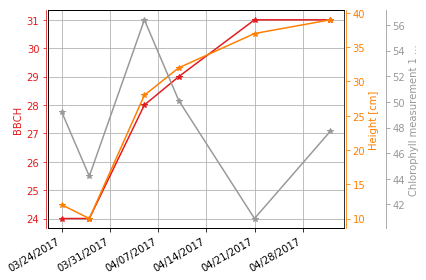

In [5]:
# Plot 3 values for field '301 (WT) high':
values = ['BBCH','Height [cm]', 'Chlorophyll measurement 1 [avarage of 10 SPAD Units]']
field_id = '301 (WT) high'

plot_from_reasonable_df(field_df, '301 (WT) high', values)


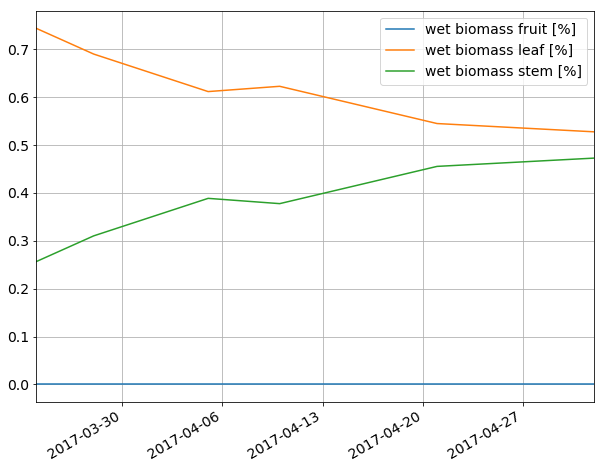

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# plot relative development of plant compartments
y = field_df[field_id][['Wet biomass total [g]']]
x = field_df[field_id][[ 'Wet biomass fruit [g]','Wet biomass leaf [g]','Wet biomass stem [g]']]

# make y a Series
y = y.iloc[:,0]
type(y)
# relative biomass:
x_new = x.div(y, axis='index')

# rename columns and plot
x_new.columns = ['wet biomass fruit [%]','wet biomass leaf [%]','wet biomass stem [%]']
x_new.plot(figsize=(10,8), fontsize = 14)
plt.legend(fontsize=14)
plt.grid()
plt.show()







## DEPRECATED ##

The extracted values are were stored in *field.data* as dictionary with the keys beeing *datetime.date* objects representing the measurement date of the field data.  

~~*create_reasonable_multiindex_df* is now the default option when initializing the class object.~~

These were the initial access methods, which still work (~~if create_df is set False when initializing class object~~) but are all but practical..





In [ ]:
field.data

### Filter by date

So date based filtering can be done either by:

In [ ]:
import datetime

field.data[datetime.date(2017, 3, 28)]

or by the implemented filter.date method:

In [ ]:
f_20170324 = field.filter_date('2017,3,24')
f_20170324

In [ ]:
f_201703 = field.filter_date(start='2017,03,3', end='2017,03,31')
f_201703

the type of the returned object then is **pd.DataFrame**:

In [ ]:
print(type(f_20170324))
print(type(f_201703))

If there is no infomation available:

In [ ]:
field.filter_date('2017,3,05')

### Filter by field

In [ ]:
field_301 = field.filter_field('301_med')

print(field_301)

In [ ]:
print(type(field_301))

# Multiple Filter

There is a method included to apply multiple filters at once: *.filter*.

In [ ]:
field_301 = field.filter(fieldnumber='301')
print('field_301 is of', type(field_301))
print('field_301[0] is of', type(field_301[0]))
print('field_301[0][0] is of', type(field_301[0][0]))
print('field_301[0][1] is of', type(field_301[0][1]))

if more arguments are given the data structure stays the same:

In [ ]:
field_301_28032017 = field.filter(fieldnumber='301 ', date='2017, 03,28',
                                  values=['BBCH'])

#print('field_301_28032017 is of', type(field_301_28032017))
#print('field_301_28032017[0] is of', type(field_301_28032017[0]))
#print('field_301_28032017[0][0] is of', type(field_301_28032017[0][0]))
#print('field_301_28032017[0][1] is of', type(field_301_28032017[0][1]))


In [ ]:
print(field_301_28032017[0][1])

In [ ]:
field_301_032017 = field.filter(fieldnumber='301', start='2017, 03,01', end='2017, 03,31')

## filter by values and fields


In [ ]:
d = field.filter(fieldnumber='301_med',
                 values=['BBCH', 'Height [cm]',
                         ('Chlorophyll measurement 1'
                          ' [avarage of 10 SPAD Units]')])

d


In [ ]:
plot_field(d, title='301_med', save=False)

## How to get the actual data

In [ ]:
d = field.filter(fieldnumber='301_med',
                 values=['BBCH', 'Height [cm]'])
d

In [ ]:
dates, data = zip(*d)
data

In [ ]:
data_BBCH = [item.values.tolist()[0][0] for item in data]
data_BBCH

In [ ]:
data_Height = [float(item.values.tolist()[1][0]) for item in data]
data_Height

In [ ]:
import pandas as pd

dic={}
for outerKey, Dataframe in d:
    for colname in list(Dataframe):
        for rowname in list(Dataframe.index):
                dic.update({(outerKey, colname, rowname): [Dataframe.ix[rowname, colname]]})

pd.DataFrame(dic)
